In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breeds/dog-breeds/husky/husky56.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky40.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky18.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky58.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky62.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky20.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky75.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky10.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky34.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky28.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky30.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky100.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky71.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky72.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky42.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky74.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky101.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky92.jpg
/kaggle/input/dog-breeds/d

In [2]:
# importing importent basic liabrary
import matplotlib.pyplot as plt 
%matplotlib inline
import os 
from tensorflow.keras import layers 
import shutil


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In our data set we  do not have the split of train and test seprately so we have to create train and test directory in kaggle working enviornment then we have to split our data into training and testing size after that we will create same sub category for the dog breed and copy training sample and test sample accordingly in the respective sub category all this steps has been done below 

***Data loading ***

In [3]:
# define variable for main working directory 
dog_main = '/kaggle/input/dog-breeds/dog-breeds'

In [4]:
# making directory for train and test
train = '/kaggle/working/train'
valid = '/kaggle/working/valid'
test = '/kaggle/working/test'

if not os.path.exists(train):
    os.makedirs(train)
if not os.path.exists(test):
    os.makedirs(test)
if not os.path.exists(valid):
    os.makedirs(valid)

In [5]:
# define list of sub category 
sub_categories = ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler']

In [6]:
#  making directory in  according to categories in train folder 
for category in sub_categories:
    category_path_train = train+'/'+category
    if not os.path.exists(category_path_train):
        os.makedirs(category_path_train)
    
    
        

In [7]:
# making direcctory according to categories in test folder 
for category in sub_categories:
    category_path_test = test+'/'+category
    if not os.path.exists(category_path_test):
        os.makedirs(category_path_test)
# making direcctory according to categories in valid folder 
for category in sub_categories:
    category_path_test = valid+'/'+category
    if not os.path.exists(category_path_test):
        os.makedirs(category_path_test)

In [8]:
# copying file for each category in train subcategory 
for category in os.listdir('/kaggle/working/test'):
    main_path = '/kaggle/input/dog-breeds/dog-breeds'+'/'+category
    train_path = train+'/'+category
    test_path = test+'/'+category
    valid_path = valid+'/'+category
    file_list =  os.listdir(main_path)
    train_size = int(0.7*len(file_list))
    train_file = file_list[:train_size]
    valid_size = train_size + int(0.2*len(file_list))
    valid_file = file_list[train_size:valid_size]
    test_file = file_list[valid_size:]
    for file in train_file:
        src_path = os.path.join(main_path,file)
        dest_path = os.path.join(train_path,file)
        shutil.copy(src_path,dest_path)
    for file in test_file:
        src_path = os.path.join(main_path,file)
        dest_path = os.path.join(test_path,file)
        shutil.copy(src_path,dest_path)
    for file in valid_file:
        src_path = os.path.join(main_path,file)
        dest_path = os.path.join(valid_path,file)
        shutil.copy(src_path,dest_path)
print('data loading completed')

data loading completed


**Creating data augemented training and validation set**

In [9]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories for the train, validation, and test sets
train_dir = 'train'
test_dir = 'test'

# Define the image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 32
# Define the data generators for the train, validation, and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
ds_train_ = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
ds_val_ = val_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')



Found 376 images belonging to 8 classes.
Found 59 images belonging to 8 classes.


**TRAINING MODEL**

In [10]:
# importing tensorflow basicc function to create model 
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow import keras



In [11]:
# from pretrained model load base 
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [12]:
# Load the pre-trained Xception model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the full model with both the pre-trained and new classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# training created model on dataset 
num_epochs = 10
history = model.fit(
    ds_train_,
    steps_per_epoch=ds_train_.samples // batch_size,
    epochs=num_epochs,
    validation_data=ds_val_,
    validation_steps=ds_val_.samples // batch_size
)

Epoch 1/10
11/11 [==============================] - 19s 862ms/step - loss: 3.9025 - accuracy: 0.7616 - val_loss: 3.0519 - val_accuracy: 0.9688
Epoch 2/10
11/11 [==============================] - 9s 782ms/step - loss: 1.7727 - accuracy: 0.9477 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 8s 744ms/step - loss: 1.7761 - accuracy: 0.9622 - val_loss: 3.2504 - val_accuracy: 0.9688
Epoch 4/10
11/11 [==============================] - 8s 745ms/step - loss: 2.5846 - accuracy: 0.9622 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 9s 798ms/step - loss: 0.5679 - accuracy: 0.9767 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 8s 740ms/step - loss: 1.0067 - accuracy: 0.9797 - val_loss: 0.0316 - val_accuracy: 0.9688
Epoch 7/10
11/11 [==============================] - 8s 743ms/step - loss: 1.1861 - accuracy: 0.9680 - val_loss: 0.0000e+00 - val_accuracy: 

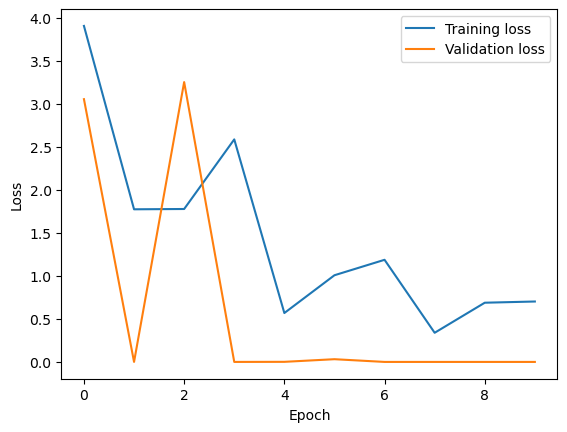

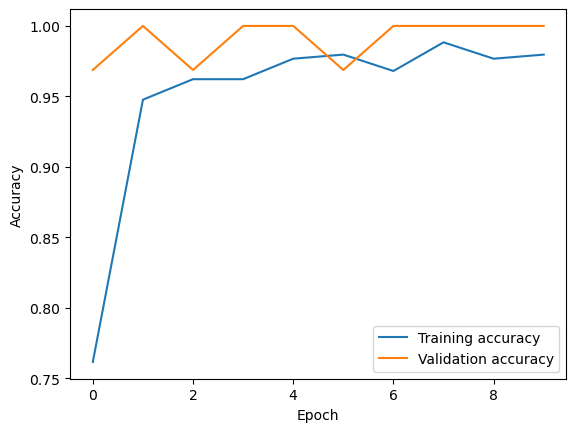

In [14]:
# now lets check the peformance of model in case of accuracy and loss 
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Prediction**

In [15]:
# Define a dictionary to convert label indices to class names
class_names = ds_train_.class_indices
class_names = {v: k for k, v in class_names.items()}

# Use the trained model to predict labels for the test images
test_dir = "/kaggle/working/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,  # Set batch size to 1 to get individual images
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = [class_names[label] for label in predicted_labels]

# Get the true labels of the test images
true_labels = test_generator.classes
true_labels = [class_names[label] for label in true_labels]

Found 59 images belonging to 8 classes.
59/59 [==============================] - 2s 15ms/step


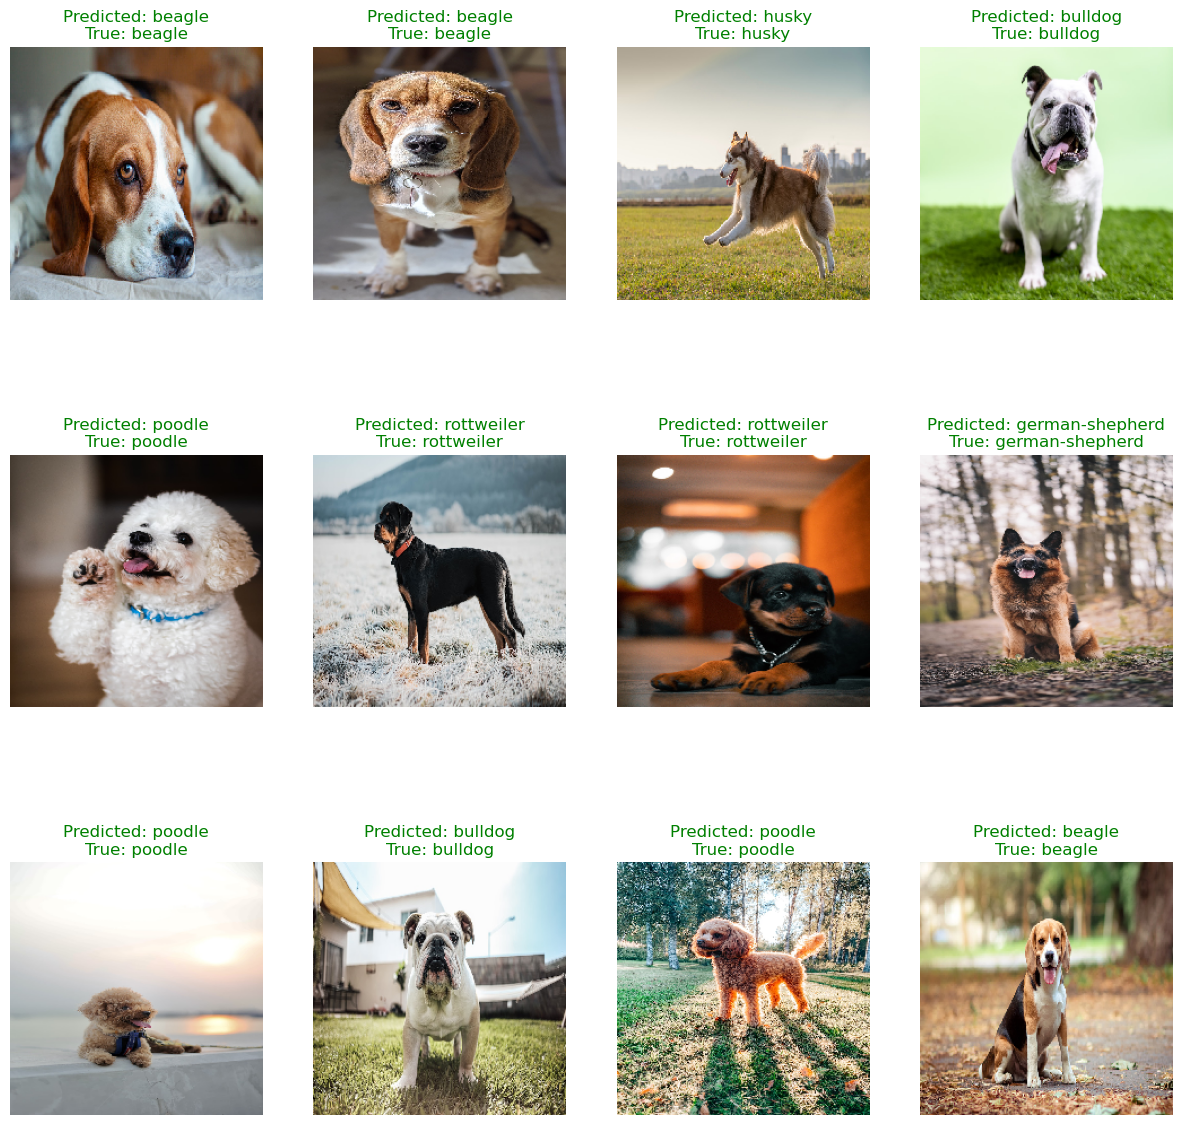

In [16]:
# Print the predicted and true labels for a subset of test images
n_rows = 3
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

np.random.seed(42)
random_indexes = np.random.choice(len(predicted_labels), size=n_rows*n_cols, replace=False)

for i, index in enumerate(random_indexes):
    img_path = test_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(img_height, img_width))
    axs[i//n_cols, i%n_cols].imshow(img)
    axs[i//n_cols, i%n_cols].axis('off')
    axs[i//n_cols, i%n_cols].set_title("Predicted: {}\nTrue: {}".format(predicted_labels[index], true_labels[index]), 
                      color='green' if predicted_labels[index] == true_labels[index] else 'red')
plt.show()

**EVALUATION**

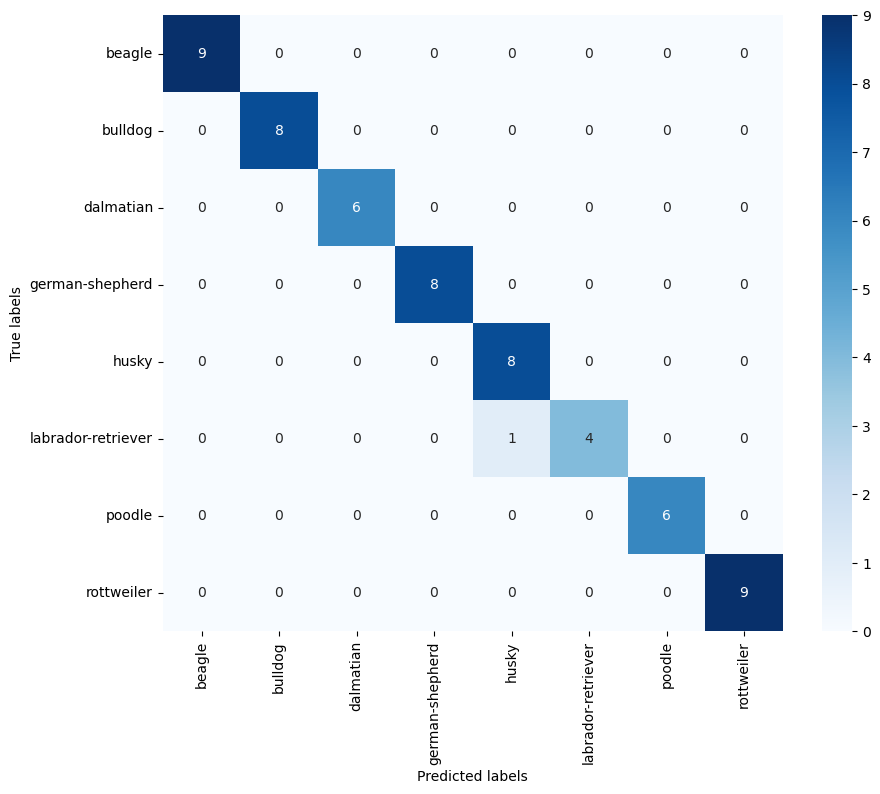

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()